In [32]:
import pandas as pd
import chardet
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support, roc_auc_score, roc_curve, auc, f1_score
from sklearn.preprocessing import OneHotEncoder
from imblearn.under_sampling import RandomUnderSampler
from sklearn.feature_selection import RFECV
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import FunctionTransformer
import numpy as np
import math
import joypy
from imblearn.under_sampling import RandomUnderSampler, EditedNearestNeighbours, TomekLinks
from imblearn.combine import SMOTETomek, SMOTEENN
from collections import Counter
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate 
from sklearn.feature_selection import SelectFromModel
from datetime import datetime
import matplotlib.ticker as ticker


# py -m pip install matplotlib

In [52]:
data_all = pd.read_csv('Data_new1.txt', sep="\t")

C:\Users\evelina.voleiso\AppData\Local\Temp\ipykernel_19492\903609593.py:1: DtypeWarning: Columns (7,10,11,12,20,23) have mixed types. Specify dtype option on import or set low_memory=False.
  data_all = pd.read_csv('Data_new1.txt', sep="\t")


In [53]:

data_all['issue_date'] = pd.to_datetime(data_all['issue_date'], errors='coerce')

data = data_all[data_all['issue_date'].dt.year == 2019]

data = data[data['PERSON_TYPE_CODE'] == 'P'] 


In [54]:
cols_to_remove = ['Country', 'IDD_CRM_ORGANIZATION_UNIT', 'islfeet', 'vehicle_type', 'OBJECT_TYPE_NAME', 'Model', 'Calculated_fleet', 'vehicle_type_group', 'IDD_AGR_AGREEMENT', 'D_BIRTH', 'ADR_REGION_NAME',
                   'IS_RESIDENT', 'RECEIVE_MARKETING_MATERIAL', 'CLIENT_LOYALTY_PROGRAM', 'ADR_FULL__GDPR', 'PERSON_TYPE_CODE'] 
data = data.drop(columns=cols_to_remove)

In [49]:
missing_values_count = data.isna().sum()

print("Number of missing values in each column:")
print(missing_values_count)


Number of missing values in each column:
PRODUCT                           0
policy_no                         0
issue_date                        0
start_date                        0
end_date                          0
cancel_date                  115967
Duration                          0
Vehicle_age                    1215
Make                              0
GWP                               0
vehicle_type_group_mapped         0
REGISTRATION_CODE__GDPR           0
ADR_CITY_NAME                  7667
D_DRIVING_LICENSE              7704
number_of_claims             118166
IsRenewed                     73296
Channel                           0
dtype: int64


In [55]:
data['GWP'] = data['GWP'].round(2)

In [51]:
data = data.sort_values(by=['ADR_CITY_NAME', 'D_DRIVING_LICENSE'], ascending=[False, False])
data = data.drop_duplicates(subset=['policy_no'], keep='first')

In [39]:
polisas =data[(data['policy_no'] == '270 0218154') ]


In [7]:
polisas

PRODUCT    policy_no issue_date  start_date    end_date cancel_date  \
1762     MOD  270 0218154 2019-02-05  2019-02-06  2020-02-05  2019-10-24   
1763     MOD  270 0218154 2019-02-05  2019-02-06  2020-02-05  2019-10-24   
1764     MOD  270 0218154 2019-02-05  2019-02-06  2020-02-05  2019-10-24   
1765     MOD  270 0218154 2019-02-05  2019-02-06  2020-02-05  2019-10-24   
1766     MOD  270 0218154 2019-02-05  2019-02-06  2020-02-05  2019-10-24   
1767     MOD  270 0218154 2019-02-05  2019-02-06  2020-02-05  2019-10-24   

     Duration Vehicle_age        Make    GWP vehicle_type_group_mapped  \
1762     Long          13  LAND ROVER  76.88               6) Personal   
1763     Long          13  LAND ROVER  76.90               6) Personal   
1764     Long          13  LAND ROVER  76.91               6) Personal   
1765     Long          13  LAND ROVER  76.90               6) Personal   
1766     Long          13  LAND ROVER  76.91               6) Personal   
1767     Long          13  LAND ROVER  76.88               6) Personal   

     REGISTRATION_CODE__GDPR ADR_CITY_NAME D_DRIVING_LICENSE  \
1762             39010310213       Ukmergė         01JAN2014   
1763             39010310213       Ukmergė         01JAN2014   
1764             39010310213           NaN               NaN   
1765             39010310213           NaN               NaN   
1766             39010310213       Ukmergė         01JAN2014   
1767             39010310213           NaN               NaN   

      number_of_claims  IsRenewed Channel  
1762               1.0        NaN  Broker  
1763               1.0        NaN  Broker  
1764               1.0        NaN  Broker  
1765               1.0        NaN  Broker  
1766               1.0        NaN  Broker  
1767               1.0        NaN  Broker

In [255]:
k = data['policy_no'].value_counts()
k

policy_no
300 0996385      1
300 1011084      1
300 1008336      1
300 1003064      1
300 1000017      1
300 0999007      1
300 0995638      1
300 0995079      1
300 0992589      1
300 0990849      1
270 0238464      1
270 0234735      1
270 0234443      1
270 0234133      1
270 0232826      1
270 0232439      1
270 0229227      1
270 0225531      1
270 0224696      1
270 0217114      1
300 1039231      1
300 1024900      1
300 1014057      1
300 1109033      1
300 1105808      1
300 1010517      1
300 1012340      1
300 1099577      1
300 1016443      1
300 1053907      1
300 1052930      1
300 1051343      1
300 1051319      1
300 1050484      1
300 1047954      1
300 1047807      1
300 1043679      1
300 1042820      1
300 1042819      1
300 1041248      1
300 1040777      1
300 1034089      1
300 1033102      1
300 1030779      1
300 1028638      1
300 1025289      1
300 1024687      1
300 1024220      1
300 1022608      1
300 1017884      1
300 1017677      1
300 1016901      1
30

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 127730 entries, 6 to 1828594
Data columns (total 17 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   PRODUCT                    127730 non-null  object        
 1   policy_no                  127730 non-null  object        
 2   issue_date                 127730 non-null  datetime64[ns]
 3   start_date                 127730 non-null  object        
 4   end_date                   127730 non-null  object        
 5   cancel_date                11763 non-null   object        
 6   Duration                   127730 non-null  object        
 7   Vehicle_age                126515 non-null  object        
 8   Make                       127730 non-null  object        
 9   GWP                        127730 non-null  float64       
 10  vehicle_type_group_mapped  127730 non-null  object        
 11  REGISTRATION_CODE__GDPR    127730 non-null  object      

In [207]:
#data = data.drop_duplicates(subset='policy_no', keep='last')

In [56]:
data.drop_duplicates(inplace=True)

In [9]:
k = data['policy_no'].value_counts()
k

policy_no
270 0218154     6
270 0221320     6
270 0238546     6
270 0219191     6
270 0234363     6
               ..
300 1028554     1
300 1028553     1
300 1028552     1
300 1028551     1
P300 4401085    1
Name: count, Length: 109856, dtype: int64

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 109856 entries, 300623 to 380301
Data columns (total 17 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   PRODUCT                    109856 non-null  object        
 1   policy_no                  109856 non-null  object        
 2   issue_date                 109856 non-null  datetime64[ns]
 3   start_date                 109856 non-null  object        
 4   end_date                   109856 non-null  object        
 5   cancel_date                7100 non-null    object        
 6   Duration                   109856 non-null  object        
 7   Vehicle_age                108763 non-null  object        
 8   Make                       109856 non-null  object        
 9   GWP                        109856 non-null  float64       
 10  vehicle_type_group_mapped  109856 non-null  object        
 11  REGISTRATION_CODE__GDPR    109856 non-null  object  

In [57]:
data['issue_date'] = pd.to_datetime(data['issue_date'], errors='coerce')
data['start_date'] = pd.to_datetime(data['start_date'], errors='coerce')
data['end_date'] = pd.to_datetime(data['end_date'], errors='coerce')
data['cancel_date'] = pd.to_datetime(data['cancel_date'], errors='coerce')
data['D_DRIVING_LICENSE'] = pd.to_datetime(data['D_DRIVING_LICENSE'], errors='coerce')

data_1 = data.copy()

data_1['Churn'] = data_1['cancel_date'].notna().astype(int)
data_1['Renewal'] = data_1['IsRenewed'].notna().astype(int)

data_1['Policy_Duration'] = (data_1['end_date'] - data_1['start_date']).dt.days

def gender(registration_code):
    registration_code_str = str(registration_code)
    if registration_code_str[0].isdigit():
        first_digit = int(registration_code_str[0])
        if first_digit % 2 == 1:
            return 'Male'
        else:
            return 'Female'
    else:
        return 'Unknown'

data_1['Gender'] = data_1['REGISTRATION_CODE__GDPR'].apply(gender)

data_2 = data_1.copy()
df_private = data_2



cols_to_convert_numeric = ['Vehicle_age', 'GWP', 'Policy_Duration']

df_private[cols_to_convert_numeric] = df_private[cols_to_convert_numeric].apply(pd.to_numeric, errors='coerce')

df_private.drop_duplicates(inplace=True)


def extract_birth_date(registration_code):
    registration_code_str = str(registration_code)
    
    if registration_code_str.isdigit() and len(registration_code_str) == 11:
        year_digits = int(registration_code_str[1:3])
        month = int(registration_code_str[3:5])
        day = int(registration_code_str[5:7])
        
        if year_digits <= 10:
            birth_year = 2000 + year_digits
        else:
            birth_year = 1900 + year_digits
        
        try:
            birth_date = datetime(birth_year, month, day)
            return birth_date.strftime('%Y-%m-%d')
        except ValueError:
            return 'Unknown'
    else:
        return 'Unknown'

df_private['Birth_Date'] = df_private['REGISTRATION_CODE__GDPR'].apply(extract_birth_date)

# Calculate client age from birth date
df_private['Birth_Date'] = pd.to_datetime(df_private['Birth_Date'], errors='coerce')
df_private['Client_Age'] = (df_private['issue_date'] - df_private['Birth_Date']).dt.days // 365




C:\Users\evelina.voleiso\AppData\Local\Temp\ipykernel_19492\3497663452.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['D_DRIVING_LICENSE'] = pd.to_datetime(data['D_DRIVING_LICENSE'], errors='coerce')


In [58]:
missing_values_count = df_private.isna().sum()

print("Number of missing values in each column:")
print(missing_values_count)

Number of missing values in each column:
PRODUCT                           0
policy_no                         0
issue_date                        0
start_date                        0
end_date                          0
cancel_date                  114621
Duration                          0
Vehicle_age                    1187
Make                              0
GWP                               0
vehicle_type_group_mapped         0
REGISTRATION_CODE__GDPR           0
ADR_CITY_NAME                  6178
D_DRIVING_LICENSE              6215
number_of_claims             116821
IsRenewed                     72445
Channel                           0
Churn                             0
Renewal                           0
Policy_Duration                   0
Gender                            0
Birth_Date                       10
Client_Age                       10
dtype: int64


In [59]:
df_private['ADR_CITY_NAME'] = df_private['ADR_CITY_NAME'].fillna('Unknown')

In [60]:

brands_to_keep = ['BMW', 'TOYOTA', 'VW', 'VOLVO', 'AUDI', 'OPEL', 'MERCEDES BENZ', 
    'FORD', 'HONDA', 'PEUGEOT', 'NISSAN', 'CITROEN', 'SKODA', 'RENAULT', 
    'SUBARU', 'MAZDA', 'KIA', 'HYUNDAI', 'MITSUBISHI', 'SUZUKI', 'CHRYSLER', 
    'SEAT', 'LEXUS', 'YAMAHA', 'KAWASAKI', 'SAAB', 'FIAT', 'JEEP', 
    'CHEVROLET', 'MINI', 'ALFA ROMEO', 'LAND ROVER', 'DODGE', 'JAGUAR', 
    'DAIMLERCHRYSLER', 'APRILIA', 'LANCIA', 'KTM', 'ROVER']

df_private['Make'] = df_private['Make'].astype(str)


df_private['Make'] = df_private['Make'].apply(lambda x: x if x in brands_to_keep else 'Other')


df_private['Make'] = df_private['Make'].astype('category')


df_private['ADR_CITY_NAME'] = df_private['ADR_CITY_NAME'].fillna('Unknown')


Cities_to_keep = ['Vilnius', 'Kaunas', 'Panevėžys', 'Klaipėda', 'Šiauliai', 'Alytus', 'Marijampolė', 'Mažeikiai', 'Jonava', 
    'Telšiai', 'Vilniaus m. sav.', 'Kauno m. sav.', 'Panevėžio m. sav.', 'Klaipėdos m. sav.', 'Alytaus m. sav.', 
    'Kauno r. sav.', 'Vilniaus r. sav.', 'Alytaus r. sav.', 'Panevėžio r. sav.', 'KAUNO RAJONO SAV.', 
    'Vilniaus rajono sav.', 'Klaipėdos r. sav.', 'Marijampolės sav.', 'Šiaulių m. sav.', 'Klaipėdos rajono sav.', 
    'Šiaulių r. sav.', 'ALYTAUS RAJONO SAV.', 'Panevėžio rajono sav.', 'Šiaulių raj.', 'Unknown'
]

df_private['ADR_CITY_NAME'] = df_private['ADR_CITY_NAME'].astype(str)

df_private['ADR_CITY_NAME'] = df_private['ADR_CITY_NAME'].apply(lambda x: x if x in Cities_to_keep else 'Other')

city_mapping = {
    'Vilnius': 'Vilnius', 
    'Kaunas': 'Kaunas', 
    'Panevėžys': 'Panevėžys',
    'Klaipėda':'Klaipėda',
    'Šiauliai':'Šiauliai',
    'Alytus':'Alytus',
    'Marijampolė':'Marijampolė',
    'Mažeikiai':'Mažeikiai',
    'Jonava':'Jonava', 
    'Telšiai':'Telšiai',
    'Vilniaus m. sav.': 'Vilnius',
    'Kauno m. sav.': 'Kaunas',
    'Panevėžio m. sav.': 'Panevėžys',
    'Klaipėdos m. sav.': 'Klaipėda',
    'Alytaus m. sav.': 'Alytus',
    'Kauno r. sav.': 'Kauno rajonas',
    'Vilniaus r. sav.': 'Vilniaus rajonas',
    'Alytaus r. sav.': 'Alytaus rajonas',
    'Panevėžio r. sav.': 'Panevėžio rajonas',
    'KAUNO RAJONO SAV.': 'Kauno rajonas',
    'Vilniaus rajono sav.': 'Vilniaus rajonas',
    'Klaipėdos r. sav.': 'Klaipėdos rajonas',
    'Marijampolės sav.': 'Marijampolės rajonas',
    'Šiaulių m. sav.': 'Šiauliai',
    'Klaipėdos rajono sav.': 'Klaipėdos rajonas',
    'Šiaulių r. sav.': 'Šiaulių rajonas',
    'ALYTAUS RAJONO SAV.': 'Alytaus rajonas',
    'Panevėžio rajono sav.': 'Panevėžio rajonas',
    'Šiaulių raj.': 'Šiaulių rajonas',
    'Unknown': 'Unknown',
    'Other': 'Other'
}

df_private['City'] = df_private['ADR_CITY_NAME'].map(city_mapping)



df_private['D_DRIVING_LICENSE'] = pd.to_datetime(df_private['D_DRIVING_LICENSE'], errors='coerce')
df_private['issue_date'] = pd.to_datetime(df_private['issue_date'], errors='coerce')



df_private['Years_of_driving'] = (df_private['issue_date'].dt.year - df_private['D_DRIVING_LICENSE'].dt.year)

df_private['number_of_claims'] = df_private['number_of_claims'].fillna(0)

In [61]:
missing_values_count = df_private.isna().sum()

print("Number of missing values in each column:")
print(missing_values_count)

Number of missing values in each column:
PRODUCT                           0
policy_no                         0
issue_date                        0
start_date                        0
end_date                          0
cancel_date                  114621
Duration                          0
Vehicle_age                    1187
Make                              0
GWP                               0
vehicle_type_group_mapped         0
REGISTRATION_CODE__GDPR           0
ADR_CITY_NAME                     0
D_DRIVING_LICENSE              6215
number_of_claims                  0
IsRenewed                     72445
Channel                           0
Churn                             0
Renewal                           0
Policy_Duration                   0
Gender                            0
Birth_Date                       10
Client_Age                       10
City                              0
Years_of_driving               6215
dtype: int64


In [266]:
df_private.info()

<class 'pandas.core.frame.DataFrame'>
Index: 109856 entries, 300623 to 380301
Data columns (total 25 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   PRODUCT                    109856 non-null  object        
 1   policy_no                  109856 non-null  object        
 2   issue_date                 109856 non-null  datetime64[ns]
 3   start_date                 109856 non-null  datetime64[ns]
 4   end_date                   109856 non-null  datetime64[ns]
 5   cancel_date                7100 non-null    datetime64[ns]
 6   Duration                   109856 non-null  object        
 7   Vehicle_age                108763 non-null  float64       
 8   Make                       109856 non-null  category      
 9   GWP                        109856 non-null  float64       
 10  vehicle_type_group_mapped  109856 non-null  object        
 11  REGISTRATION_CODE__GDPR    109856 non-null  object  

In [62]:
cols_to_remove2 = ['issue_date', 'D_DRIVING_LICENSE', 'start_date', 'end_date', 'cancel_date', 'REGISTRATION_CODE__GDPR', 'ADR_CITY_NAME', 'IsRenewed', 'Birth_Date' ] 
df_private = df_private.drop(columns=cols_to_remove2)

In [63]:
missing_values_count = df_private.isna().sum()

print("Number of missing values in each column:")
print(missing_values_count)

Number of missing values in each column:
PRODUCT                         0
policy_no                       0
Duration                        0
Vehicle_age                  1187
Make                            0
GWP                             0
vehicle_type_group_mapped       0
number_of_claims                0
Channel                         0
Churn                           0
Renewal                         0
Policy_Duration                 0
Gender                          0
Client_Age                     10
City                            0
Years_of_driving             6215
dtype: int64


In [65]:
df_private_MTPL3 = df_private

categorical_columns = ['PRODUCT', 'Duration', 'Make', 'vehicle_type_group_mapped', 'Gender', 'City', 'Channel']

encoder = OneHotEncoder(sparse_output=False, handle_unknown='error')

X_encoded = encoder.fit_transform(df_private_MTPL3[categorical_columns])

encoded_column_names = encoder.get_feature_names_out(categorical_columns)

df_encoded = pd.DataFrame(X_encoded, columns=encoded_column_names)

df_private_MTPL3 = pd.concat([df_private_MTPL3.drop(columns=categorical_columns), df_encoded], axis=1)

In [66]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import IterativeImputer
from sklearn.metrics import mean_squared_error, r2_score


df_private_MTPL3 = pd.DataFrame(df_private_MTPL3)

# Step 3: Remove Rows with NA Values
df_clean = df_private_MTPL3.dropna()

# Step 4: Split the Data into Training and Testing Sets
X = df_clean.drop('Years_of_driving', axis=1)
y = df_clean['Years_of_driving']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 5: Tune Hyperparameters using GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

model = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', verbose=2)
grid_search.fit(X_train, y_train)

# Best model
best_model = grid_search.best_estimator_

# Step 6: Train the Best Model
best_model.fit(X_train, y_train)

# Step 7: Evaluate the Model
y_test_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_test_pred)
r2 = r2_score(y_test, y_test_pred)

print(f"Mean Squared Error on Test Set: {mse}")
print(f"R^2 Score on Test Set: {r2}")

# Step 8: If the Model is Good, Use IterativeImputer to Fill Missing Values
if r2 > 0.8:  # Assuming 0.8 as a threshold for a good model, adjust as needed
    imputer = IterativeImputer(estimator=best_model, random_state=42)
    df_filled = pd.DataFrame(imputer.fit_transform(df_private), columns=df_private.columns)
    
    # Print the filled DataFrame
    print(df_filled)
else:
    print("The model performance is not satisfactory.")

Fitting 3 folds for each of 108 candidates, totalling 324 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END max_

ValueError: 
All the 324 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
108 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\evelina.voleiso\AppData\Roaming\Python\Python312\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\evelina.voleiso\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\evelina.voleiso\AppData\Roaming\Python\Python312\site-packages\sklearn\ensemble\_forest.py", line 363, in fit
    X, y = self._validate_data(
           ^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\evelina.voleiso\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py", line 650, in _validate_data
    X, y = check_X_y(X, y, **check_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\evelina.voleiso\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py", line 1263, in check_X_y
    X = check_array(
        ^^^^^^^^^^^^
  File "C:\Users\evelina.voleiso\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py", line 997, in check_array
    array = _asarray_with_order(array, order=order, dtype=dtype, xp=xp)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\evelina.voleiso\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\_array_api.py", line 521, in _asarray_with_order
    array = numpy.asarray(array, order=order, dtype=dtype)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\evelina.voleiso\AppData\Roaming\Python\Python312\site-packages\pandas\core\generic.py", line 2150, in __array__
    arr = np.asarray(values, dtype=dtype)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: could not convert string to float: '270 0236488'

--------------------------------------------------------------------------------
216 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\evelina.voleiso\AppData\Roaming\Python\Python312\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\evelina.voleiso\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\evelina.voleiso\AppData\Roaming\Python\Python312\site-packages\sklearn\ensemble\_forest.py", line 363, in fit
    X, y = self._validate_data(
           ^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\evelina.voleiso\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py", line 650, in _validate_data
    X, y = check_X_y(X, y, **check_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\evelina.voleiso\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py", line 1263, in check_X_y
    X = check_array(
        ^^^^^^^^^^^^
  File "C:\Users\evelina.voleiso\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py", line 997, in check_array
    array = _asarray_with_order(array, order=order, dtype=dtype, xp=xp)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\evelina.voleiso\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\_array_api.py", line 521, in _asarray_with_order
    array = numpy.asarray(array, order=order, dtype=dtype)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\evelina.voleiso\AppData\Roaming\Python\Python312\site-packages\pandas\core\generic.py", line 2150, in __array__
    arr = np.asarray(values, dtype=dtype)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: could not convert string to float: '270 0219455'


In [67]:
df_private_MTPL = df_private

In [68]:
df_private_MTPL['Vehicle_age'] = pd.to_numeric(df_private_MTPL['Vehicle_age'], errors='coerce')
df_private_MTPL['GWP'] = pd.to_numeric(df_private_MTPL['GWP'], errors='coerce')
df_private_MTPL['number_of_claims'] = pd.to_numeric(df_private_MTPL['number_of_claims'], errors='coerce')
df_private_MTPL['Client_Age'] = pd.to_numeric(df_private_MTPL['Client_Age'], errors='coerce')
df_private_MTPL['Policy_Duration'] = pd.to_numeric(df_private_MTPL['Policy_Duration'], errors='coerce')
df_private_MTPL['Years_of_driving'] = pd.to_numeric(df_private_MTPL['Years_of_driving'], errors='coerce')

df_private_MTPL['PRODUCT'] = pd.Categorical(df_private_MTPL['PRODUCT'])
df_private_MTPL['Duration'] = pd.Categorical(df_private_MTPL['Duration'])
df_private_MTPL['Make'] = pd.Categorical(df_private_MTPL['Make'])
df_private_MTPL['vehicle_type_group_mapped'] = pd.Categorical(df_private_MTPL['vehicle_type_group_mapped'])
df_private_MTPL['City'] = pd.Categorical(df_private_MTPL['City'])
df_private_MTPL['Churn'] = pd.Categorical(df_private_MTPL['Churn'])
df_private_MTPL['Renewal'] = pd.Categorical(df_private_MTPL['Renewal'])
df_private_MTPL['Gender'] = pd.Categorical(df_private_MTPL['Gender'])
df_private_MTPL['Channel'] = pd.Categorical(df_private_MTPL['Channel'])


In [36]:
k = df_private['Churn'].value_counts()
k

Churn
0    114621
1     11620
Name: count, dtype: int64

In [69]:
df_private['Vehicle_age'] = pd.to_numeric(df_private['Vehicle_age'], errors='coerce')
df_private['GWP'] = pd.to_numeric(df_private['GWP'], errors='coerce')
df_private['number_of_claims'] = pd.to_numeric(df_private['number_of_claims'], errors='coerce')
df_private['Client_Age'] = pd.to_numeric(df_private['Client_Age'], errors='coerce')
df_private['Policy_Duration'] = pd.to_numeric(df_private['Policy_Duration'], errors='coerce')
df_private['Years_of_driving'] = pd.to_numeric(df_private['Years_of_driving'], errors='coerce')

In [38]:
missing_values_count = df_private.isna().sum()

# Output the number of missing values in each column
print("Number of missing values in each column:")
print(missing_values_count)


Number of missing values in each column:
PRODUCT                         0
policy_no                       0
Duration                        0
Vehicle_age                  1187
Make                            0
GWP                             0
vehicle_type_group_mapped       0
number_of_claims                0
Channel                         0
Churn                           0
Renewal                         0
Policy_Duration                 0
Gender                          0
Client_Age                     10
City                            0
Years_of_driving             6215
dtype: int64


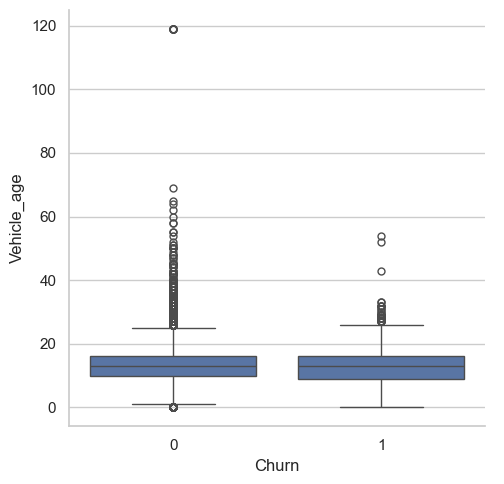

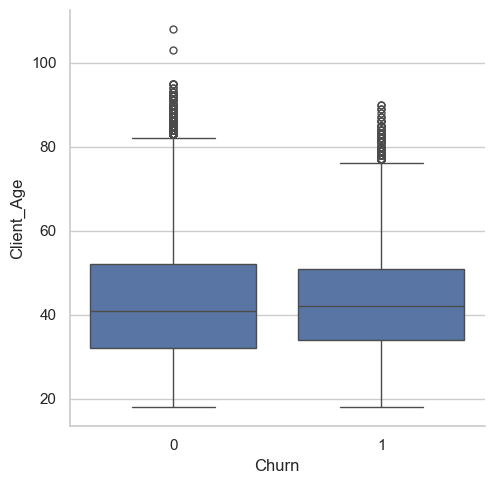

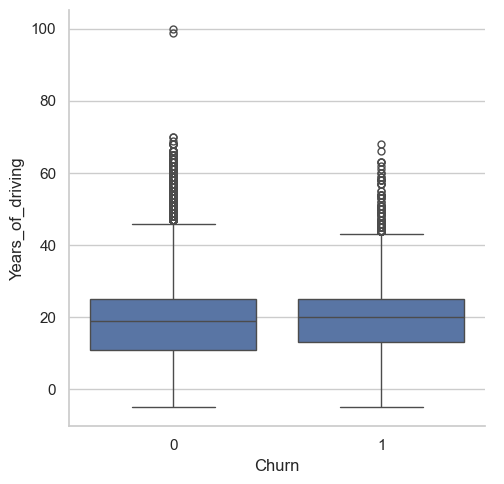

In [272]:
# zinome, kad bus outlieriu sitose stulpeliuose, todel pasiplotinam paziureti:

sns.catplot(data=df_private, x="Churn", y='Vehicle_age', kind="box")

sns.catplot(data=df_private, x="Churn", y='Client_Age', kind="box")

sns.catplot(data=df_private, x="Churn", y='Years_of_driving', kind="box")


In [40]:
df_private = df_private[(df_private['Vehicle_age'] >= 0) & (df_private['Vehicle_age'] <= 70)]
df_private =df_private[(df_private['Client_Age'] >= 18) & (df_private['Client_Age'] <= 90)]
df_private =df_private[(df_private['Years_of_driving'] >= 0) & (df_private['Years_of_driving'] <= 72)]
df_private =df_private[(df_private['Policy_Duration'] >= 0) & (df_private['Policy_Duration'] <= 400)]
df_private =df_private[(df_private['GWP'] >= 0)]

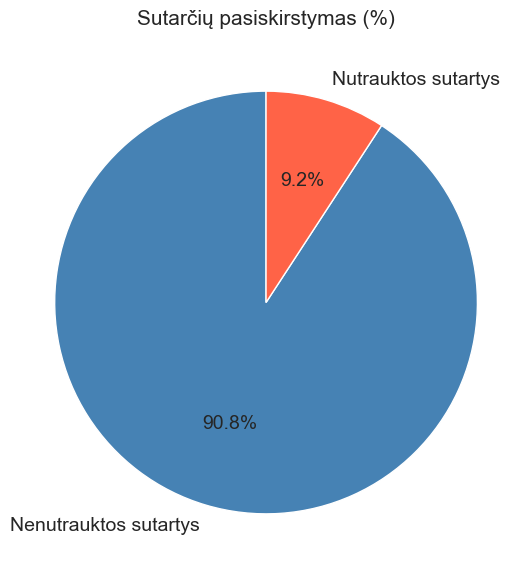

In [70]:
churn_counts = df_private['Churn'].value_counts(normalize=False) * 100
sns.set(style="whitegrid") 

fig, ax = plt.subplots(figsize=(6, 7))
ax.pie(churn_counts, labels=['Nenutrauktos sutartys', 'Nutrauktos sutartys'], autopct='%1.1f%%', startangle=90, colors=['#4682B4', '#FF6347'],  textprops={'fontsize': 14})
ax.set_title('Sutarčių pasiskirstymas (%)', fontsize=15)
ax.axis('equal')  

plt.show()

In [71]:
cols_to_remove = ['policy_no'] 
df_private = df_private.drop(columns=cols_to_remove)

In [72]:
df_private_MTPL3 = df_private

categorical_columns = ['PRODUCT', 'Duration', 'Make', 'vehicle_type_group_mapped', 'Gender', 'City', 'Channel']

encoder = OneHotEncoder(sparse_output=False, handle_unknown='error')

X_encoded = encoder.fit_transform(df_private_MTPL3[categorical_columns])

encoded_column_names = encoder.get_feature_names_out(categorical_columns)

df_encoded = pd.DataFrame(X_encoded, columns=encoded_column_names)

df_private_MTPL3 = pd.concat([df_private_MTPL3.drop(columns=categorical_columns), df_encoded], axis=1)

In [86]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import IterativeImputer
from sklearn.metrics import mean_squared_error, r2_score


df_private_MTPL3 = pd.DataFrame(df_private_MTPL3)

df_private_MTPL3 = pd.DataFrame(df_private_MTPL3)

df_clean = df_private_MTPL3.dropna()

X = df_clean.drop('Years_of_driving', axis=1)
y = df_clean['Years_of_driving']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_trainh, X_testh, y_trainh, y_testh = train_test_split(X, y, test_size=0.7, random_state=42)

param_dist = {
    'n_estimators': [200, 300, 400, 500],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 4)
}

model = RandomForestRegressor(random_state=42)
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist, cv=5, scoring='neg_mean_squared_error', random_state=42, verbose=2)
random_search.fit(X_trainh, y_trainh)

best_model = random_search.best_estimator_

best_model.fit(X_train, y_train)

y_test_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_test_pred)
r2 = r2_score(y_test, y_test_pred)

print(f"Mean Squared Error on Test Set: {mse}")
print(f"R^2 Score on Test Set: {r2}")


if r2 > 0.8: 
    imputer = IterativeImputer(estimator=best_model, random_state=42)
    df_filled = pd.DataFrame(imputer.fit_transform(df_private_MTPL3), columns=df_private_MTPL3.columns)
    
    # Print the filled DataFrame
    print(df_filled)
else:
    print("The model performance is not satisfactory.")

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=8, n_estimators=400; total time=   6.8s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=8, n_estimators=400; total time=   6.9s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=8, n_estimators=400; total time=   7.2s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=8, n_estimators=400; total time=   7.1s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=8, n_estimators=400; total time=   7.0s
[CV] END max_depth=30, min_samples_leaf=1, min_samples_split=6, n_estimators=400; total time=   8.0s
[CV] END max_depth=30, min_samples_leaf=1, min_samples_split=6, n_estimators=400; total time=   7.8s
[CV] END max_depth=30, min_samples_leaf=1, min_samples_split=6, n_estimators=400; total time=   8.0s
[CV] END max_depth=30, min_samples_leaf=1, min_samples_split=6, n_estimators=400; total time=   7.7s
[CV] END max_depth=30, min_sam

In [42]:
X = df_private.drop(columns=['Churn']) 
y = df_private['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=42)

X_train_ht, X_test_ht, y_train_ht, y_test_ht = train_test_split(X_train, y_train, stratify=y_train, test_size=0.8, random_state=42)

In [46]:
pd.set_option('display.max_rows', None)  # None means show all rows
pd.set_option('display.max_columns', None)  # None means show all columns
pd.set_option('display.width', 1000)  # Set the width of the display for wrapping
pd.set_option('display.max_colwidth', None)  # Display full content of each column


k = X_test['policy_no'].value_counts()
k

policy_no
300 1004325     2
270 0223735     2
270 0224849     2
270 0232590     2
270 0225473     2
270 0239206     2
300 1004239     2
270 0228300     2
270 0233701     2
270 0239362     2
270 0223497     2
300 1073862     2
300 1031044     2
270 0232648     2
300 1021782     2
270 0223259     2
300 1084452     2
270 0233104     2
270 0237041     2
270 0218631     2
270 0235244     2
300 1075006     2
270 0220964     2
270 0220116     2
270 0217914     2
270 0236182     2
270 0228751     2
270 0222827     2
300 1090837     2
300 1108615     2
270 0230670     2
270 0221177     2
270 0237545     2
300 1073781     2
270 0238010     2
270 0219946     2
300 1025266     2
270 0237332     2
270 0226626     2
300 1038545     2
270 0220667     2
300 1104236     2
270 0236447     2
270 0218244     2
300 1100115     2
300 1078522     2
300 1072503     2
270 0237385     2
270 0216919     2
300 1016868     2
300 1010795     2
270 0221275     2
270 0228843     2
270 0232565     2
270 0225624     2


In [47]:
df_private.info()

<class 'pandas.core.frame.DataFrame'>
Index: 118600 entries, 6 to 1828594
Data columns (total 16 columns):
 #   Column                     Non-Null Count   Dtype   
---  ------                     --------------   -----   
 0   PRODUCT                    118600 non-null  object  
 1   policy_no                  118600 non-null  object  
 2   Duration                   118600 non-null  object  
 3   Vehicle_age                118600 non-null  float64 
 4   Make                       118600 non-null  category
 5   GWP                        118600 non-null  float64 
 6   vehicle_type_group_mapped  118600 non-null  object  
 7   number_of_claims           118600 non-null  float64 
 8   Channel                    118600 non-null  object  
 9   Churn                      118600 non-null  int32   
 10  Renewal                    118600 non-null  int32   
 11  Policy_Duration            118600 non-null  int64   
 12  Gender                     118600 non-null  object  
 13  Client_Age        

In [76]:
import pandas as pd
import chardet
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support, roc_auc_score, roc_curve, auc, f1_score
from sklearn.preprocessing import OneHotEncoder
from imblearn.under_sampling import RandomUnderSampler
from sklearn.feature_selection import RFECV
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import FunctionTransformer
import numpy as np
import math
import joypy
from imblearn.under_sampling import RandomUnderSampler, EditedNearestNeighbours, TomekLinks
from imblearn.combine import SMOTETomek, SMOTEENN
from collections import Counter
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate 
from sklearn.feature_selection import SelectFromModel
from datetime import datetime
import matplotlib.ticker as ticker
from matplotlib.legend_handler import HandlerLine2D
#import ray 


from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import EditedNearestNeighbours
from imblearn.under_sampling import TomekLinks
from imblearn.over_sampling import ADASYN
from imblearn.combine import SMOTETomek
from sklearn.metrics import fbeta_score
from sklearn.metrics import make_scorer, roc_auc_score, f1_score, precision_recall_curve, precision_recall_fscore_support



# py -m pip install matplotlib

In [24]:
p = df_private['number_of_claims'].value_counts()
p

number_of_claims
0.0    109800
1.0      7140
2.0      1349
3.0       233
4.0        52
5.0        15
7.0         5
6.0         4
9.0         2
Name: count, dtype: int64

In [25]:
df_private.to_csv('df_private.txt', sep="\t", index=False)